I use the CRISP DM methodology to analyze the Seattle airbnb dataset for 2016. The CRISP-DM methodology has the following stages:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

Using this methodology, I will try to answer the following questions:

1. How is the seasonal occupancy in Seattle? What are the most/least crowded months? 
2. What are the neighbourhood trends in Seattle. Which neighbourhoods have the maximum listings, which are the most/least expensive neighourhoods, how does the availability in different neighbourhoods vary across different seasons. 
3. Can we construct a predictive model to predict the price of a listing based on the different attributes in the datasets. How good is the predictive model? What are some important features that are indicative of the price of the listing? 

In [3]:
#@title Load Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
print("Packages loaded")

Packages loaded


In [10]:
###########Reading the different files###########
seattle_airbnb_listings = pd.read_csv("/Users/animesh/Documents/udacity/airbnb/seattle/listings.csv", low_memory=False)
seattle_airbnb_calendar = pd.read_csv("/Users/animesh/Documents/udacity/airbnb/seattle/calendar.csv", low_memory=False, parse_dates=True)
seattle_airbnb_reviews = pd.read_csv("/Users/animesh/Documents/udacity/airbnb/seattle/reviews.csv", low_memory=False, parse_dates=True)

Exploring the different datasets

In [11]:
###########Lets explore the data#################
seattle_airbnb_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
seattle_airbnb_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
seattle_airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


The first question can be answered by looking at the 
monthwise data. We can use the calendar as well as the reviews data
to answer this questions since there is a time stamp associated
with this data. Lets look at the distribution of total comments over different months from the reviews dataset
which could provide information on the number of people visiting Seattle across different seasons. 

In [14]:
#######################Convert time stamp into month for the reviews data#################################
seattle_airbnb_reviews['date'] = pd.to_datetime(seattle_airbnb_reviews['date'], errors='coerce')
seattle_airbnb_reviews['month'] = seattle_airbnb_reviews['date'].dt.month
seattle_airbnb_reviews['months'] = seattle_airbnb_reviews['date'].dt.strftime('%b')

seattle_airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month,months
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,7,Jul
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,7,Jul
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",7,Jul
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,8,Aug
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,8,Aug


Below is the distribution of total number of comments received across the year. This indirectly tells us about the occupancy for each month. The plot shows that from January to May, the occupancy is relatively low. The occupancy starts increasing from June onwards with peak hitting in August. 

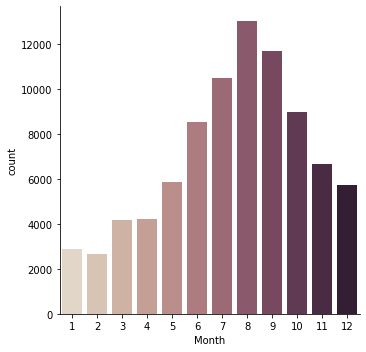

In [21]:
################distribution of total number of comments received from January to December############
ax = sns.catplot(x="month", kind="count", palette="ch:.25", data=seattle_airbnb_reviews);
ax.set(xlabel='Month') 

Lets explore into the calendars data which also has a time stamp associated with each listing. 

In [632]:
#######################Convert time stamp into month for the calendar data#################################
seattle_airbnb_calendar['date'] = pd.to_datetime(seattle_airbnb_calendar['date'], errors='coerce')
seattle_airbnb_calendar['month'] = seattle_airbnb_calendar['date'].dt.month
seattle_airbnb_calendar['months'] = seattle_airbnb_calendar['date'].dt.strftime('%b')

In [633]:
seattle_airbnb_calendar.head(10)

,listing_id,date,available,price,month,months,available_num,price_num,price_occupancy
0,241032,2016-01-04,t,$85.00,1,Jan,1,85.0,85.0
1,241032,2016-01-05,t,$85.00,1,Jan,1,85.0,85.0
2,241032,2016-01-06,f,NaN,1,Jan,0,NaN,NaN
3,241032,2016-01-07,f,NaN,1,Jan,0,NaN,NaN
4,241032,2016-01-08,f,NaN,1,Jan,0,NaN,NaN
5,241032,2016-01-09,f,NaN,1,Jan,0,NaN,NaN
6,241032,2016-01-10,f,NaN,1,Jan,0,NaN,NaN
7,241032,2016-01-11,f,NaN,1,Jan,0,NaN,NaN
8,241032,2016-01-12,f,NaN,1,Jan,0,NaN,NaN
9,241032,2016-01-13,t,$85.00,1,Jan,1,85.0,85.0


The calendar data has availability (true or false) as well as the price (if available) for every listing for every day in 2016. This would allow us to construct a time series plot showing the average occupancy as well as average price for every single day in 2016. We could then deduce the seasonal patterns from this time series plot. 

In [471]:
#######################Converting t to 1 and f to 0 in the available column#################################
seattle_airbnb_calendar['available_num'] = seattle_airbnb_calendar['available'].map(lambda available: 1 if available == 't' else 0)
#######################Removing "$" from price############################################################
seattle_airbnb_calendar['price_num'] = seattle_airbnb_calendar['price'].str.replace("[$, ]", "").astype("float")

In [472]:
(seattle_airbnb_calendar.head())

,listing_id,date,available,price,month,months,available_num,price_num,price_occupancy
0,241032,2016-01-04,t,$85.00,1,Jan,1,85.0,85.0
1,241032,2016-01-05,t,$85.00,1,Jan,1,85.0,85.0
2,241032,2016-01-06,f,NaN,1,Jan,0,NaN,NaN
3,241032,2016-01-07,f,NaN,1,Jan,0,NaN,NaN
4,241032,2016-01-08,f,NaN,1,Jan,0,NaN,NaN


In [473]:
##########################calculate average availability as a function of date#########################
seattle_airbnb_calendar_ts = seattle_airbnb_calendar[['date', 'available_num']].groupby('date').mean()
##########################Calculating the occupancy############################
seattle_airbnb_calendar_ts['occupied'] = 1 - seattle_airbnb_calendar_ts
###########################Calculate the price of the listing on the available date################
seattle_airbnb_calendar['price_occupancy'] = seattle_airbnb_calendar['price_num']*seattle_airbnb_calendar['available_num']
###########################calculate average price as a function of date###############################
seattle_airbnb_calendar_ts['price_occupancy'] = seattle_airbnb_calendar[['date', 'price_occupancy']].groupby('date').mean()

Below is the average occupancy as well as the average price for every single day in 2016. The results contradicts 
our previous findings that January has low occupancy. Infact, the occupancy is quite high in January which gradually decreases till April. One reason could be that the prices are at an all time low in January. The occupancy increases from April onwards and hits a peak in August/September when the prices are at an all time high. Post September, the occupancy as well as the prices both decrease. The high occupancy during the summer corroborates our previous findings, based on the reviews dataset. However, there is no explanation as to why occupancy is at an all time high in January, based on the datasets available to us. Maybe this is specific to the year 2016. We need more data to gain more insights into this phenomenon. 

Text(0, 0.5, 'Occupancy')

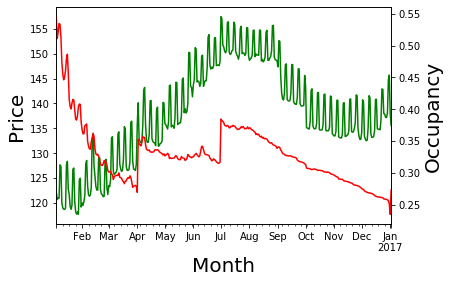

In [475]:
 plt.figure()
 ax = seattle_airbnb_calendar_ts['price_occupancy'].plot(color='green')  
 ax.set_ylabel('Price', fontsize=20)
 ax.set_xlabel('Month', fontsize=20)   
 #ax.xticks(size=12)

 ax1 = ax.twinx()
 ax1 = seattle_airbnb_calendar_ts['occupied'].plot(color='red')
 ax1.set_ylabel('Occupancy', fontsize=20)

This is the end of Part 1. Lets look at the different neighbourhoods and try to find out the least and the most expensive neighbourhoods to live in Seattle. We make use of the listings data and the neighbourhood_group_cleansed column to gain insights into the different neighbourhoods and how the availablity/price change at different periods in a year. 

In [478]:
#######################Number of listings corresponding to different neighbourhoods#########################
seattle_airbnb_listings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

Below are stacked bar plots showing the number of listings corresponding to different neighbourhoods, different property types and different room types. It can be clearly seen that most listings belong to either an apartment or a house. Also, most listings do not have sharing options. 

Text(0.5, 0, 'Property Type')

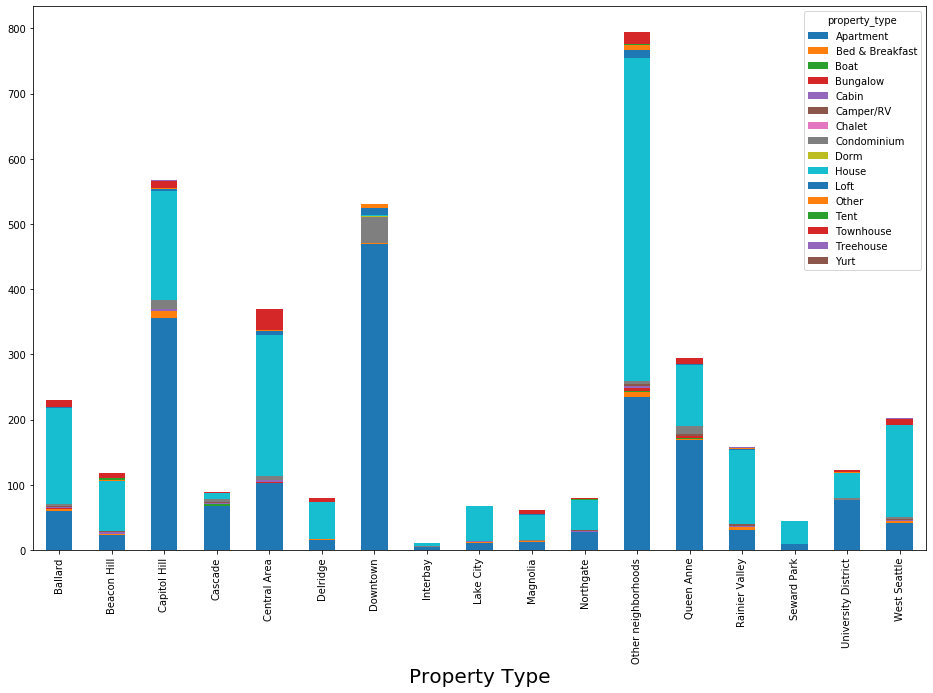

In [638]:
#######Bar plot showing the number of listings corresponding to different neighbourhoods######
seattle_airbnb_listings_property = seattle_airbnb_listings.groupby(['property_type', 'neighbourhood_group_cleansed']).size().reset_index().pivot(columns='property_type', index='neighbourhood_group_cleansed', values=0)
ax = seattle_airbnb_listings_property.plot(kind='bar', stacked=True, figsize=(16,10))
ax.set_xlabel('Property Type', fontsize=20)

Text(0.5, 0, 'Room Type')

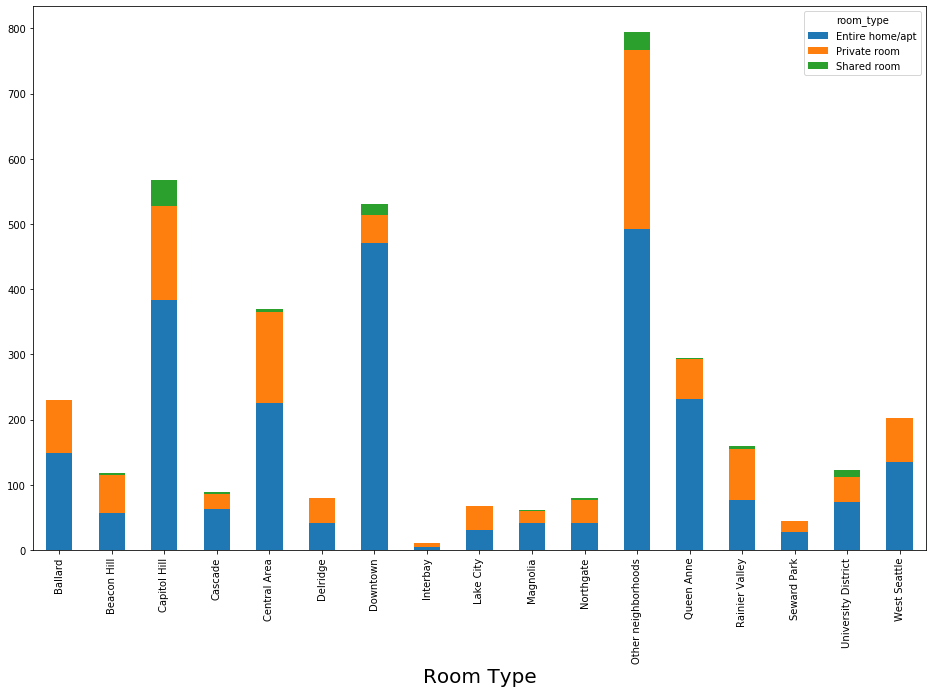

In [639]:
#######Bar plot showing the number of listings corresponding to different neighbourhoods######
seattle_airbnb_listings_room = seattle_airbnb_listings.groupby(['room_type', 'neighbourhood_group_cleansed']).size().reset_index().pivot(columns='room_type', index='neighbourhood_group_cleansed', values=0)
ax=seattle_airbnb_listings_room.plot(kind='bar', stacked=True, figsize=(16,10))
ax.set_xlabel("Room Type", fontsize=20)

Below is the mean/std of the price corresponding to each neighbourhood. From the analysis, Magnolia, Queen Anne, Downtown are three most expensive places to rent while Lake City, Rainier Valley, Northgate are the three cheapest places to rent. 

In [640]:
#######################Removing the $ sign from the price#######################################
seattle_airbnb_listings['price'] = seattle_airbnb_listings['price'].replace("[$, ]", "").astype("float")

####################Looking at the average price in each neighbourhood#########################
seattle_airbnb_listings_neighbourhood = seattle_airbnb_listings[['longitude','latitude','price','neighbourhood_group_cleansed', 'number_of_reviews']]
seattle_airbnb_listings_neighbourhood_price = seattle_airbnb_listings_neighbourhood[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').agg({'price': ['mean', 'std']})
seattle_airbnb_listings_neighbourhood_price['price'].sort_values('mean', ascending=False)

,mean,std
neighbourhood_group_cleansed,,
Magnolia,177.672131,150.078726
Queen Anne,157.223729,115.863385
Downtown,154.405660,90.902800
West Seattle,141.359606,89.147801
Cascade,140.101124,112.179042
Capitol Hill,130.592593,92.442331
Central Area,128.338753,80.260558
Ballard,124.682609,87.925033
Other neighborhoods,119.968514,86.580450


We can see that the standard deviations are quite large. Lets filter out the outliers that have prices more than 
300$. It can be seen that there are slight changes in the average price although the standard deviation is much lower now. Magnolia, Queen Anne, Downtown remain the three most expensive places to rent an airbnb while Beacon Hill, Rainier Valley, Northgate are the three cheapest places.

In [641]:
################################Filter out the expensive listings########################################
seattle_airbnb_listings_neighbourhood_cut = seattle_airbnb_listings_neighbourhood[seattle_airbnb_listings_neighbourhood.price < 300]
seattle_airbnb_listings_neighbourhood_price_cut = seattle_airbnb_listings_neighbourhood_cut[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').agg({'price': ['mean', 'std']})
seattle_airbnb_listings_neighbourhood_price_cut['price'].sort_values('mean', ascending=False)

,mean,std
neighbourhood_group_cleansed,,
Downtown,138.982072,49.088190
Magnolia,130.192308,67.491768
Queen Anne,127.415730,53.668954
West Seattle,124.137566,62.686930
Cascade,117.190476,47.539071
Central Area,115.447293,56.060548
Capitol Hill,114.304267,52.647705
Interbay,109.727273,60.003485
Ballard,107.194444,55.194364


As a fun excercise, I use the folium library to generate Seattle's map and visualize the distribution of prices in different regions in Seattle using the latitude and longitude information from the listings' data. 

We now use the listings dataset as well as the calenders dataset to look into the neighbourhood occupancy and prices
at different periods in a year, since we have the time data stored in the calendars' dataset. We merge these two datasets using pd.merge  

In [642]:
###############################Renaming 'id' column to 'listing_id'#################################
seattle_airbnb_listings.rename(columns={'id':'listing_id'}, inplace=True)

In [643]:
#####################Merge the calendar and listings data frame on listing_id###########################
seattle_airbnb_calendar_listing = pd.merge(seattle_airbnb_calendar, seattle_airbnb_listings, on='listing_id')

seattle_airbnb_calendar_listing[["neighbourhood_group_cleansed", "month", "available_num"]].head()

,neighbourhood_group_cleansed,month,available_num
0,Queen Anne,1,1
1,Queen Anne,1,1
2,Queen Anne,1,0
3,Queen Anne,1,0
4,Queen Anne,1,0


In [645]:
#######################Looking at the availability in each neighbourhood for each month############################
neighbourhood_occupancy = seattle_airbnb_calendar_listing[["neighbourhood_group_cleansed", "month", "available_num"]].groupby(['neighbourhood_group_cleansed', 'month']).mean()
neighbourhood_occupancy

available_num
neighbourhood_group_cleansed month               
Ballard                      1           0.533043
                             2           0.613643
                             3           0.682889
                             4           0.668551
                             5           0.701964
                             6           0.731449
                             7           0.666199
                             8           0.700000
                             9           0.721449
                             10          0.741094
                             11          0.761159
                             12          0.779102
Beacon Hill                  1           0.596045
                             2           0.692870
                             3           0.749043
                             4           0.720621
                             5           0.737015
                             6           0.723729
                             7           0.650082
                             8           0.696555
                             9           0.700847
                             10          0.705850
                             11          0.716102
                             12          0.742482
Capitol Hill                 1           0.544680
                             2           0.629326
                             3           0.661888
                             4           0.613698
                             5           0.626842
                             6           0.641093
...                                           ...
Seward Park                  7           0.600440
                             8           0.607038
                             9           0.618182
                             10          0.678886
                             11          0.681818
                             12          0.692815
University District          1           0.695082
                             2           0.768513
                             3           0.790323
                             4           0.720219
                             5           0.745108
                             6           0.760656
                             7           0.724749
                             8           0.738763
                             9           0.741257
                             10          0.744844
                             11          0.744809
                             12          0.758065
West Seattle                 1           0.596552
                             2           0.698318
                             3           0.748768
                             4           0.702135
                             5           0.706181
                             6           0.724466
                             7           0.668679
                             8           0.674877
                             9           0.705090
                             10          0.714604
                             11          0.725780
                             12          0.746226

[204 rows x 1 columns]

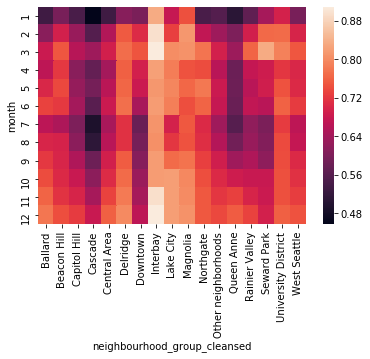

In [526]:
#####################################Plotting a heat map####################################################
neighbourhood_occupancy_map = neighbourhood_occupancy.reset_index().pivot(columns='neighbourhood_group_cleansed',index='month',values='available_num')
sns.heatmap(neighbourhood_occupancy_map)

It can be seen from the heat map above that during the peak season (July-Septmeber), people prefer to stay in neighbourhoods like Cascade, Seward Park, Downtown, Queen Anne, while places like University District, Magnolia, Delridge have similar occupancies all throughout the year. Interbay has the least occupancy all throughout the year. Next we repeat the same analysis by looking at the price trends. 

In [644]:
neighbourhood_price = seattle_airbnb_calendar_listing[["neighbourhood_group_cleansed", "month", "price_num"]].groupby(['neighbourhood_group_cleansed', 'month']).mean()
neighbourhood_price

price_num
neighbourhood_group_cleansed month            
Ballard                      1      108.986406
                             2      110.033227
                             3      113.237420
                             4      120.999350
                             5      122.753247
                             6      135.055280
                             7      138.565895
                             8      139.124224
                             9      131.257533
                             10     126.943603
                             11     126.323305
                             12     129.631683
Beacon Hill                  1       97.777725
                             2       96.401518
                             3       94.018613
                             4       99.030576
                             5      102.737389
                             6      105.828649
                             7      105.394449
                             8      103.394035
                             9      102.107618
                             10      99.686677
                             11     100.196055
                             12     101.333211
Capitol Hill                 1      123.823421
                             2      125.381330
                             3      129.379577
                             4      134.181818
                             5      135.511436
                             6      141.496378
...                                        ...
Seward Park                  7      119.803419
                             8      121.463768
                             9      122.435049
                             10     119.444924
                             11     118.816667
                             12     119.830688
University District          1       94.948899
                             2       96.716808
                             3       98.777852
                             4      106.583080
                             5      108.026615
                             6      108.418463
                             7      108.939803
                             8      111.939155
                             9      107.608551
                             10     105.169329
                             11     104.517608
                             12     104.452389
West Seattle                 1      140.519956
                             2      136.937485
                             3      137.891341
                             4      145.114359
                             5      146.612736
                             6      154.083182
                             7      161.445817
                             8      159.073464
                             9      154.262692
                             10     147.409162
                             11     146.429412
                             12     147.817291

[204 rows x 1 columns]

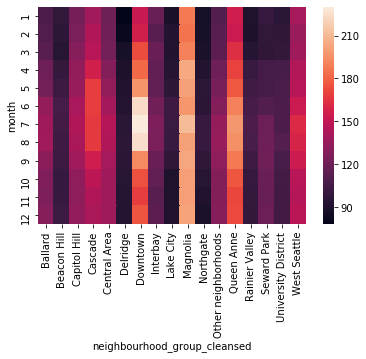

In [528]:
neighbourhood_price_map = neighbourhood_price.reset_index().pivot(columns='neighbourhood_group_cleansed',index='month',values='price_num')

sns.heatmap(neighbourhood_price_map)

The heap map above shows that prices in Beacon Hill, Delridge, Northgate, Lake City are quite low through the year  while the prices in Downtown, Queen Anne, Magnolia are quite high with peak prices around the summer. 

This is the final part where we try to predict the price of the listing using the different attributes corresponding
to each listing. We use a linear and a random forest regressor. Below are the different steps involved in preparing the data for modeling the data. 

In [529]:
seattle_airbnb_listings.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [530]:
seattle_airbnb_listings.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

We eliminate the unimportant attributes corresponding to a listing such as listing_id, listing_url, scrape_id etc. 

In [604]:
##########################selecting the relevant attributes#######################
seattle_airbnb_listings_regression = seattle_airbnb_listings[[
       'host_response_time', 'host_response_rate',
       'host_is_superhost', 'minimum_nights', 'maximum_nights', 
       'neighbourhood_group_cleansed', 
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 
       'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'reviews_per_month', 'amenities']]

######################dropping the columns that have more than 25% null values###############
percentage_na = seattle_airbnb_listings_regression.isnull().sum(axis=0) / df.shape[0] * 100
missing_data_columns = percentage_na[percentage_na > 25].index.tolist()
seattle_airbnb_listings_regression = seattle_airbnb_listings_regression.drop(missing_data_columns, axis=1)
print (seattle_airbnb_listings_regression.columns)

#######################removing the strings from the numerical columns######################
seattle_airbnb_listings_regression['host_response_rate'] = seattle_airbnb_listings_regression['host_response_rate'].str.replace("%", "").astype("float")
seattle_airbnb_listings_regression['extra_people'] = seattle_airbnb_listings_regression['extra_people'].str.replace("$", "").astype("float")

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'minimum_nights', 'maximum_nights', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'amenities'],
      dtype='object')


In [605]:
#############################Shows the missing values in all the columns###############################
percent_missing = seattle_airbnb_listings_regression.isnull().sum() * 100 / len(seattle_listings_drop_na)
print (percent_missing)

host_response_time                  13.698271
host_response_rate                  13.698271
host_is_superhost                    0.052383
minimum_nights                       0.000000
maximum_nights                       0.000000
neighbourhood_group_cleansed         0.000000
property_type                        0.026192
room_type                            0.000000
accommodates                         0.000000
bathrooms                            0.419068
bedrooms                             0.157150
beds                                 0.026192
bed_type                             0.000000
price                                0.000000
guests_included                      0.000000
extra_people                         0.000000
review_scores_rating                16.946045
review_scores_accuracy              17.234154
review_scores_cleanliness           17.103195
review_scores_checkin               17.234154
review_scores_communication         17.050812
review_scores_location            

In [606]:
######################Function to find the unique amenities from the "amenities" column#####################
def unique_amenities(df):
 unique = (df.str.strip("{}").unique().tolist())
 unique = [i.replace('"', '') for i in unique]
 total_unique =[]
 for unique_ in unique:
    if (unique_ != ''):
        unique_ = unique_.split(',')
        for str_ in unique_:
           total_unique.append(str_)
 unique_amenities = list(set(total_unique)) 
 return unique_amenities

In [607]:
##################Calls the unique_amenities funtion to get a list of unique amenities####################
unique_amenities = unique_amenities(seattle_airbnb_listings_regression.amenities)
print ("Unique Amenities")
print (unique_amenities)
############################For every unique amenity, add 1 if the amenity is present in the listing, zero otherwise
for col in unique_amenities:
    seattle_airbnb_listings_regression[col] = seattle_airbnb_listings_regression['amenities'].apply(lambda amenities: 1 if col in amenities else 0)
seattle_airbnb_listings_regression.drop(['amenities', 'Pets live on this property'], axis=1, inplace=True)    

['Essentials', '24-Hour Check-in', 'Family/Kid Friendly', 'Washer', 'Smoking Allowed', 'Internet', 'Hair Dryer', 'Smoke Detector', 'Cat(s)', 'Pets Allowed', 'Elevator in Building', 'Fire Extinguisher', 'Hot Tub', 'Wheelchair Accessible', 'Dryer', 'Lock on Bedroom Door', 'Free Parking on Premises', 'Iron', 'Hangers', 'Wireless Internet', 'TV', 'Suitable for Events', 'Doorman', 'Indoor Fireplace', 'Other pet(s)', 'Shampoo', 'Air Conditioning', 'Gym', 'Buzzer/Wireless Intercom', 'Cable TV', 'Kitchen', 'Dog(s)', 'Breakfast', 'Safety Card', 'Carbon Monoxide Detector', 'Laptop Friendly Workspace', 'First Aid Kit', 'Pets live on this property', 'Pool', 'Washer / Dryer', 'Heating']


In [647]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
##############Get the numerical columns#######################
seattle_listings_num = seattle_airbnb_listings_regression.select_dtypes(include=numerics).columns.tolist()
##############Get the categorical columns#####################
seattle_listings_cat = seattle_airbnb_listings_regression.select_dtypes(include=['object', 'category']).columns.tolist()
print ("Numerical Columns ->")
print (seattle_listings_num)
print ("Categorical Columns ->")
print (seattle_listings_cat)

Numerical Columns ->
['host_response_rate', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'Essentials', '24-Hour Check-in', 'Family/Kid Friendly', 'Washer', 'Smoking Allowed', 'Internet', 'Hair Dryer', 'Smoke Detector', 'Cat(s)', 'Pets Allowed', 'Elevator in Building', 'Fire Extinguisher', 'Hot Tub', 'Wheelchair Accessible', 'Dryer', 'Lock on Bedroom Door', 'Free Parking on Premises', 'Iron', 'Hangers', 'Wireless Internet', 'TV', 'Suitable for Events', 'Doorman', 'Indoor Fireplace', 'Other pet(s)', 'Shampoo', 'Air Conditioning', 'Gym', 'Buzzer/Wireless Intercom', 'Cable TV', 'Kitchen', 'Dog(s)', 'Breakfast', 'Safety Card', 'Carbon Monoxide Detector', 'Laptop Friendly Workspace', 'First Aid Kit', 'Pool',

Converting the categorical columns to dummy variables

In [609]:
####################Convert the categorical columns to dummy variables###########################
seattle_listings_final = (pd.get_dummies(seattle_airbnb_listings_regression, dummy_na=True, columns=seattle_listings_cat, drop_first=True))
####################Drop those columns where all the row values are same##########################
nunique = seattle_listings_final.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
seattle_listings_final.drop(cols_to_drop, axis=1, inplace=True)

Fill the missing values in the numerical columns by the average value in the columns

In [612]:
###################Fill the missing values in the numerical columns by the mean of the columns###################
columns = ['host_response_rate', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in columns:
  seattle_listings_final[col].fillna(seattle_listings_final[col].mean(), inplace=True)

Prepare the train and the test data and scaling the variables

In [613]:
#######################Prepare the train and the test data#####################
X, y = seattle_listings_final.drop(['price'], axis=1), seattle_listings_final[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#######################Scale the training data####################################
scaler = MinMaxScaler().fit(X_train)
scaler.fit(X_train)
X_train=scaler.transform(X_train)

######################Scale the test data#########################################
X_test=scaler.transform(X_test)

In [622]:
###################Function to compute the MSE and R2 scores for an input model#####################
def compute(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict((X_train))
    mse = mean_squared_error(y_train, y_pred_train)
    r2 = r2_score(y_train, y_pred_train)
    print("Mean squared error for training data %f" % (mse))
    print('R2 training data %f' % r2)
    
    
    y_pred = model.predict((X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean squared error for test data %f" % mse)
    print('R2 test data %f' % r2)
    return model

###################Plot the important features pertaining to a given model#####################
def plot_feature_importance(importances, features):
    indices = np.argsort(importances)[::-1]
    names = [features[i] for i in indices]    
    plt.figure()
    plt.title("Feature Importance")
    plt.bar(range(len(importances[:10])), importances[indices][:10])
    plt.xticks(range(len(importances[:10])), names, rotation=90)
    plt.show()

In [623]:
features = (X.columns.tolist())

# Linear Regressor 

Mean squared error for training data 3195.732672
R2 training data 0.607819
Mean squared error for test data 3197.486875
R2 test data 0.606042


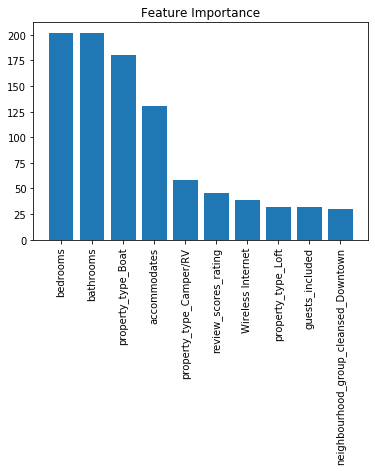

In [624]:
model = LinearRegression()
model =  compute(X_train, y_train, X_test, y_test, model)
# get importance
importance = model.coef_
# plot important features based on the values of the coefficients
plot_feature_importance(importance[0], features)

# Random Forest Regressor 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean squared error for training data 2620.798935
R2 training data 0.678375
Mean squared error for test data 3338.404526
R2 test data 0.588679


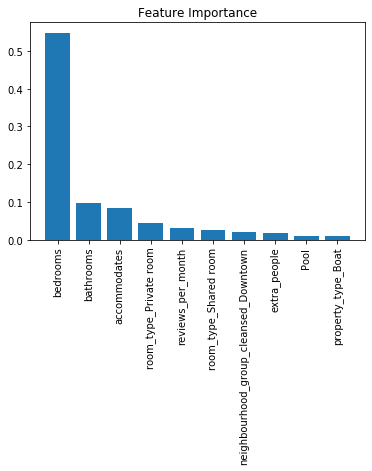

In [630]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model = (compute(X_train, y_train, X_test, y_test, model))
importance = model.feature_importances_
# plot important features
plot_feature_importance(importance, features)

From the analysis above, it can be seen that both the Linear Regression and the Random Forest Regression models give 
a R2 score of 0.6 (even on the training data), which is not a good result. From both the models, the number of bedrooms, number of bathrooms and number of people that a listing can accomodate represent the three of the most important predictors. To reduce the underfitting, there could be several issues that can be addressed:

1. Need bigger datasets with more listings
2. More complex models. 
3. Use feature selection methods to reduce the features. 
4. Invest more time in feature engineering. 